## Tugas_9 (Band Structure dan DOS dari Silicon)

In [2]:
# numerical module
import numpy as np

#setup plotting 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('./style/SciencePlots-APS.mplstyle')

1) Band Structure

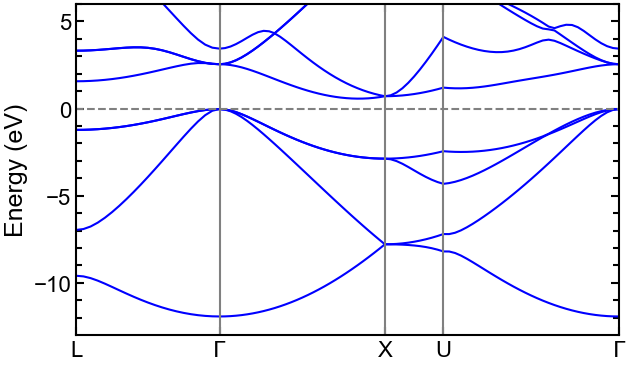

In [5]:
# module to load bandstructure data
def read_band(fname, EFermi):
    band_pw = np.loadtxt(fname)
    EF = EFermi
    kDist = np.unique(band_pw[:, 0])
    BandsPW = (np.reshape(band_pw[:, 1], (-1, len(kDist))).T) - EF
    return kDist, BandsPW

# load bandstructure
kDist, Band = read_band('./data/si.bands.gnu', EFermi=6.255)
# high-symmetry point from prefix.band.out
kNode = np.array([kDist[0], kDist[20], kDist[50], kDist[60], kDist[90]])
# label of high-symmetry
kLabel = (r'L', r'$\Gamma$', r'X', r'U', r'$\Gamma$')

# plotting
fig, axE = plt.subplots(1)

#------------------------#
# plot bandstructure
#------------------------#
for i in range(0, Band.shape[1]):
    axE.plot(kDist, Band[:, i], color='blue', lw=1.5)
# X-axis
axE.set_xlim(kNode[0], kNode[-1])
axE.set_xticks(kNode)
axE.set_xticklabels(kLabel)
axE.tick_params(axis='x', which='minor', bottom=False, top=False)
# Y-axis
axE.set_ylabel('Energy (eV)')
axE.set_ylim(-13, 6.0)
axE.axhline(0, color='gray', ls='--', lw=1.5)
axE.axvline(kDist[20], color='gray', ls='-', lw=1.5)
axE.axvline(kDist[50], color='gray', ls='-', lw=1.5)
axE.axvline(kDist[60], color='gray', ls='-', lw=1.5)

# save figure
fig.savefig('./1. Si-BandStructure.png', dpi=600)
plt.show()

2) DOS

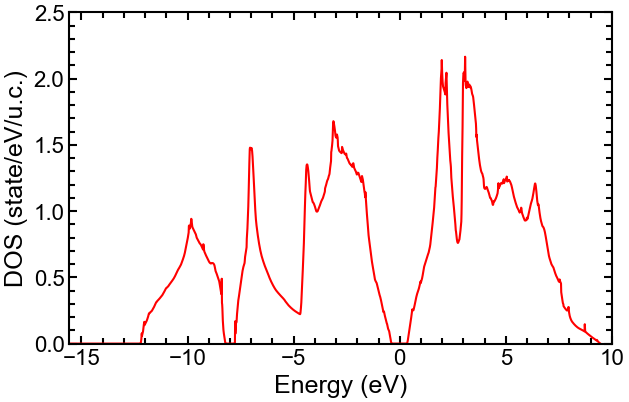

In [7]:
# module to load dos data
def read_dos(fname, EFermi):
    En, dos, idos = np.loadtxt(fname, unpack=True)
    En -= EFermi
    return En, dos

# load dos
Eneg, Dos = read_dos('./data/si.dos', EFermi=6.569)

#------------------------#
# plot density-of states
#------------------------#
plt.figure()
plt.plot(Eneg, Dos, color='red', lw=1.5)
# X-axis
plt.ylabel('DOS (state/eV/u.c.)')
plt.ylim(0, 2.5)
# Y-axis
plt.xlabel('Energy (eV)')
plt.xlim(Eneg[0], 10)

# save figure
fig.savefig('./2. Si-DOS.png', dpi=600)
plt.show()

3) PDOS

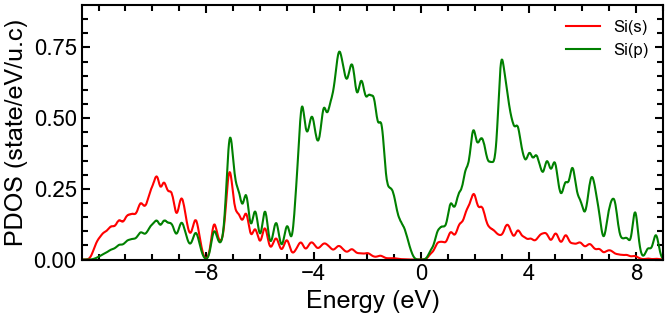

In [9]:
# The Fermi energy, find it in scf.out
EFermi = 6.569

# module to load pdos data
def read_pdos(fname, EFermi):
    ener, pdos = np.loadtxt(fname, usecols=(0,1), unpack=True)
    ener -= EFermi
    return ener, pdos

# read pdos data
    ## for s-orbital each atoms
EnSi_s, ldosSi_s = read_pdos('./data/si.pdos_atm#1(Si)_wfc#1(s)', EFermi) 
    ## for p-orbital each atoms
EnSi_p, ldosSi_p = read_pdos('./data/si.pdos_atm#1(Si)_wfc#2(p)', EFermi)

# plotting
fig, axes = plt.subplots(1, figsize=(7,3.5))

#------------------------#
# s-orbital
#------------------------#
axes.plot(EnSi_s, ldosSi_s, 'r-', lw=1.5, label='Si(s)')
axes.plot(EnSi_p, ldosSi_p, 'g-', lw=1.5, label='Si(p)')
# X-axis
axes.set_xlabel('Energy (eV)')
axes.set_xlim(EnSi_s[0], 9)
axes.set_xticks([-8, -4, 0., 4., 8.])
# Y-axis
axes.set_ylabel('PDOS (state/eV/u.c)')
axes.set_ylim(0., 0.9)
axes.set_yticks([0.0, 0.25, 0.5, 0.75])
axes.legend(loc='best', prop={'size': 12})

plt.tight_layout()
# save figure
fig.savefig('./3. Si-PDOS.png', dpi=600)
plt.show()